In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
import sklearn.metrics as metrics
from sklearn import model_selection, linear_model, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve, \
StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, classification_report, average_precision_score, roc_curve, auc
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
names =  ['ID','diagnosis','mean radius' ,'mean texture', 
         'mean perimeter' ,'mean area',
         'mean smoothness', 'mean compactness' ,
         'mean concavity',
         'mean concave points' ,'mean symmetry', 
         'mean fractal dimension',
         'radius se', 'texture se', 'perimeter se', 
         'area se',
         'smoothness se', 'compactness se', 'concavity se',
         'concave points se', 'symmetry se', 
         'fractal dimension se',
         'worst radius', 'worst texture', 'worst perimeter',
         'worst area', 'worst smoothness', 'worst compactness',
         'worst concavity', 'worst concave points', 
         'worst symmetry', 'worst fractal dimension']
df = pd.read_csv('wdbc.data', header = None, names = names)

cancer = load_breast_cancer()  # Embedded dataset
n_samples, n_features = cancer.data.shape  # Explore the data set

In [4]:
df['diagnosis'] = df['diagnosis'].replace('M',1)
df['diagnosis'] = df['diagnosis'].replace('B',0)

In [5]:
# Checking null and missing values
print("\nNull Values:\n", df.isnull().sum())
print("\nMissing Values:\n", df.isna().sum())


Null Values:
 ID                         0
diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius se                  0
texture se                 0
perimeter se               0
area se                    0
smoothness se              0
compactness se             0
concavity se               0
concave points se          0
symmetry se                0
fractal dimension se       0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Missing Values:
 ID                        

In [6]:
df.info()
# No null or missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   mean radius              569 non-null    float64
 3   mean texture             569 non-null    float64
 4   mean perimeter           569 non-null    float64
 5   mean area                569 non-null    float64
 6   mean smoothness          569 non-null    float64
 7   mean compactness         569 non-null    float64
 8   mean concavity           569 non-null    float64
 9   mean concave points      569 non-null    float64
 10  mean symmetry            569 non-null    float64
 11  mean fractal dimension   569 non-null    float64
 12  radius se                569 non-null    float64
 13  texture se               569 non-null    float64
 14  perimeter se             5

In [7]:
df.describe()

,ID,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [20]:
#correlation matrix 
corr_matrix = df.corr()  
top = abs(corr_matrix['diagnosis']).sort_values(ascending=False)[1:4]
top

worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
Name: diagnosis, dtype: float64

## Visualization

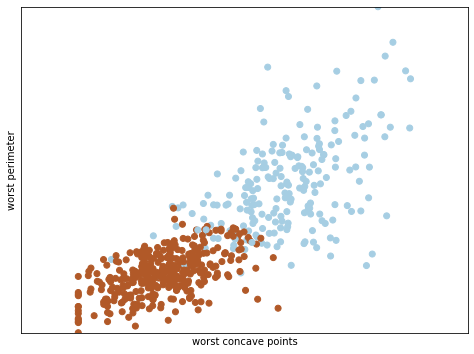

In [21]:
from mpl_toolkits.mplot3d import Axes3D

X = df.loc[:, ['worst concave points', 'worst perimeter']].values
Y = cancer.target

x_min, x_max = X[:, 0].min() - .05, X[:, 0].max() + .05
y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('worst concave points')
plt.ylabel('worst perimeter')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

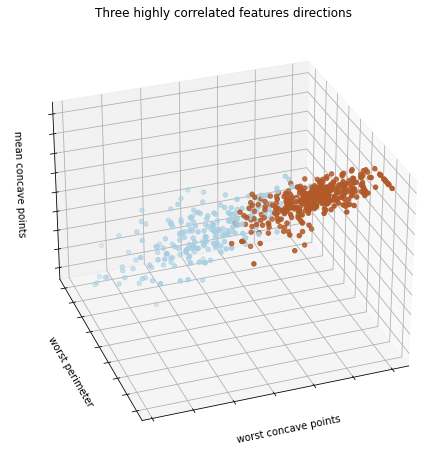

In [22]:
# coefficient with target variable
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = df.loc[:, ['worst concave points', 
                       'worst perimeter',
                       'mean concave points']].values
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
    cmap=plt.cm.Paired)
ax.set_title("Three highly correlated features directions")
ax.set_xlabel("worst concave points")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("worst perimeter")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("mean concave points")
ax.w_zaxis.set_ticklabels([])

plt.show()

## Split Data

In [8]:
X = cancer.data
y = cancer.target

# Split the data to use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.33,
                                    random_state=42)

In [9]:
# Normalization
scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

## Model Selection with nested grid search cv
#### To decide which model to use, I fisrt perform nested grid search CV to find the best model.

## Dicision Tree

In [10]:
# Set up possible values of parameters to optimize over
param_dict={'criterion':['gini','entropy'], 'max_depth':range(1,10), 'min_samples_leaf':range(1,5), 
            'min_samples_split':range(1,10)} 

d_tree = DecisionTreeClassifier(random_state=42)

# Choose cross-validation techniques for the inner and outer loops, independently of the dataset
inner_cv = KFold(n_splits=4, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=42)

# Nested CV with parameter optimization
clf = GridSearchCV(estimator=d_tree, param_grid=param_dict, cv=inner_cv)
nested_score = cross_val_score(clf, X=X_train_n, y=y_train, cv=outer_cv)
nested_scores = nested_score.mean()
print(nested_scores)

0.910827850877193


## Logistic Regression

In [11]:
# Set up possible values of parameters to optimize over
param_dict = {'C':[0.0001,0.001, 0.01, 1, 0.1, 10, 100, 1000], 'penalty':['l1','l2']}

logistic = linear_model.LogisticRegression()

# Choose cross-validation techniques for the inner and outer loops, independently of the dataset
inner_cv = KFold(n_splits=4, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=42)

# Nested CV with parameter optimization
clf = GridSearchCV(estimator=logistic, param_grid=param_dict, cv=inner_cv)
nested_score = cross_val_score(clf, X=X_train_n, y=y_train, cv=outer_cv)
nested_scores = nested_score.mean()
print(nested_scores)

0.9763980263157894


## KNN

In [12]:
# Set up possible values of parameters to optimize over
param_dict = {'n_neighbors':list(range(1,31)), 'weights':['uniform', 'distance']}

knn = KNeighborsClassifier()

# Choose cross-validation techniques for the inner and outer loops, independently of the dataset
inner_cv = KFold(n_splits=4, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=42)

# Nested CV with parameter optimization
clf = GridSearchCV(estimator=knn, param_grid=param_dict, cv=inner_cv)
nested_score = cross_val_score(clf, X=X_train_n, y=y_train, cv=outer_cv)
nested_scores = nested_score.mean()
print(nested_scores)

0.9632401315789473


## SVM

In [13]:
# Set up possible values of parameters to optimize over
param_dict = {'C':[0.1,1,100,1000],'kernel':['rbf','linear','poly','sigmoid'], 'degree':[1,2,3,4,5,6],
              'gamma':[1, 0.1, 0.01, 0.001, 0.0001]}

svm = SVC()

# Choose cross-validation techniques for the inner and outer loops, independently of the dataset
inner_cv = KFold(n_splits=4, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=4, shuffle=True, random_state=42)

# Nested CV with parameter optimization
clf = GridSearchCV(estimator=svm, param_grid=param_dict, cv=inner_cv)
nested_score = cross_val_score(clf, X=X_train_n, y=y_train, cv=outer_cv)
nested_scores = nested_score.mean()
print(nested_scores)

0.9763706140350877


#### Decision: By comparing the accuracy among the 4 models, we can see that Logistic Regression performed best in nested grid search CV, hence we'll use this model to proceed 

## Logistic Regression

In [14]:
param_dict = {'C':[0.0001,0.001, 0.01, 1, 0.1, 10, 100, 1000], 'penalty':['l1','l2']}
logistic = linear_model.LogisticRegression()

# Create grid search using 5-fold cross validation
grid = GridSearchCV(logistic, param_dict, cv=5, verbose=0)

# Fit grid search
best_model = grid.fit(X_train_n, y_train)

# View best hyperparameters
grid.best_params_

{'C': 10, 'penalty': 'l2'}

In [17]:
# Build confusion matrix and calculate other indicators
grid_predictions = grid.predict(X_test_n)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[ 65   2]
 [  2 119]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.98      0.98      0.98       121

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



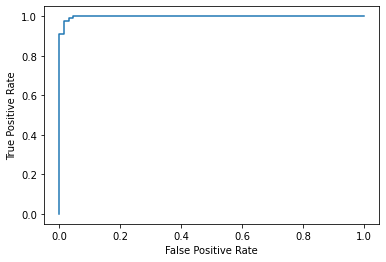

In [18]:
#define metrics
y_pred_proba = grid.predict_proba(X_test_n)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

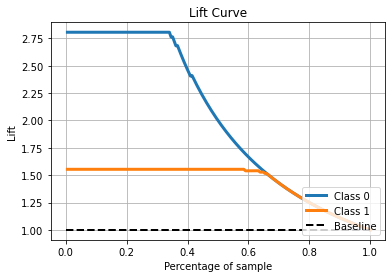

In [19]:
import scikitplot as skplt
y_score_log = grid.predict_proba(X_test_n)

# Lift Curve
skplt.metrics.plot_lift_curve(y_test, y_score_log)
plt.show()

### Conclusion: Logistic Regression got a 0.98 recall and 0.98 accuracy which show the great performance of this model. ROC curve can also support this finding, that is to say, the more that the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories. Finally, I use lift curve as visual aid for measuring model performance. And it shows a great area between the curve and baseline, which means the model is well-performed.